In [5]:
# Import the packages 
import pandas as pd
import numpy as np
import seaborn as sns


In [6]:
# Read the data
df = pd.read_csv(r'/Users/pawarunkangvanwanich/Downloads/StudentsPerformance.csv')

In [7]:
#Look at the dimensions of the data
df.shape

(1000, 8)

In [8]:
#Look at the size of the data
df.size

8000

In [9]:
#Look at the data (first five row)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
#Look at the info and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
#select only columns that are non numbers
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [12]:
#see unique value of categorical column
for i in categorical_cols:
    print(df[i].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [13]:
#Check for any missing value
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [14]:
#Describe the data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [16]:
#Look at the skewness
df.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

# Data Visualization

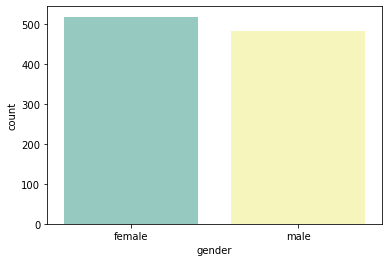

In [17]:
#gender
#there are more female students than male
color = sns.color_palette(palette='Set3')
sns.countplot(x = 'gender',data = df, palette = color);



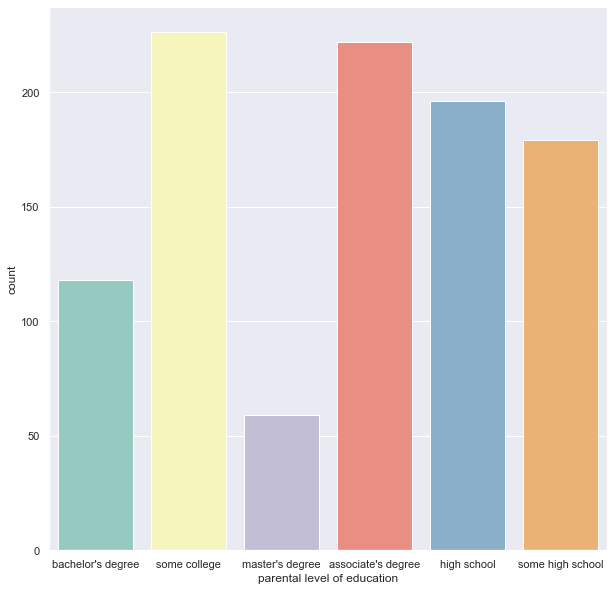

In [18]:
#Look at parental level of education
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(x ='parental level of education',data = df, palette = color);

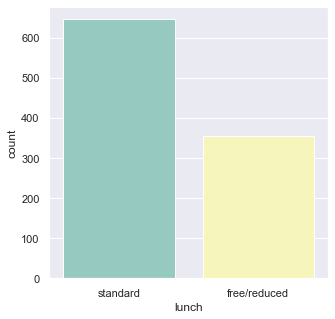

In [19]:
#Lunch
#Most of the students are eating standard lunch
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x ='lunch',data = df,palette = color);


<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

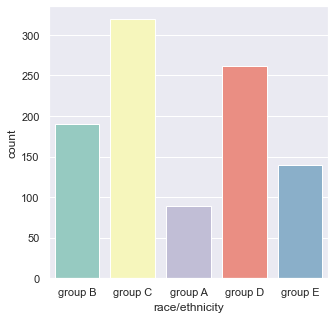

In [20]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x ='race/ethnicity',data = df,palette = color)

<AxesSubplot:xlabel='test preparation course', ylabel='count'>

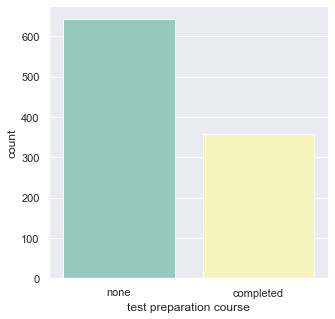

In [21]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x ='test preparation course',data = df,palette = color)

In [22]:
#Create a new column containing average test score for 3 subjects
df['average_score']=(df['math score']+df['reading score']+df['writing score'])/3
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


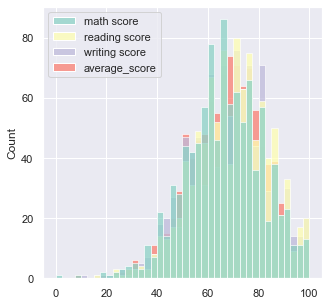

In [23]:
#Histogram of all the score
sns.histplot(data=df[['math score','reading score','writing score','average_score']],palette=sns.color_palette(palette='Set3',n_colors=4));

### Student performance in each subject based on gender

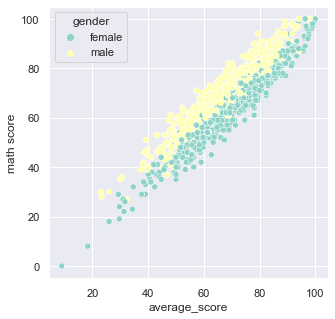

In [24]:
#math score 
color1 = sns.color_palette(palette='Set3',n_colors=2)
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(x='average_score',y='math score',hue='gender', data=df, palette=color1);

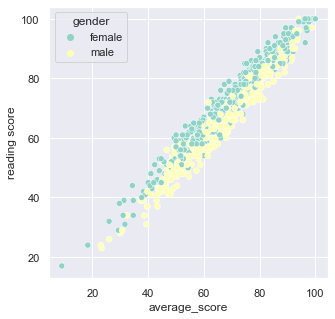

In [25]:
#reading score
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(x='average_score',y='reading score',hue='gender', data=df, palette=color1);

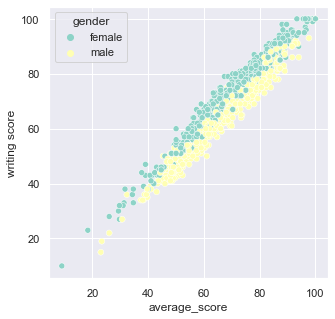

In [26]:
#writing score
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(x='average_score',y='writing score',hue='gender', data=df, palette=color1);

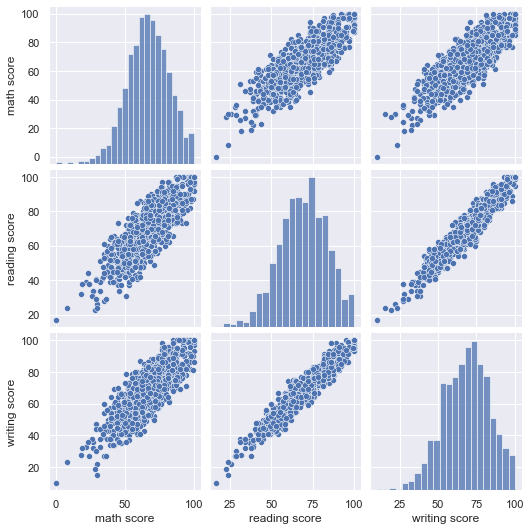

In [27]:
#Use pairplot to see the correlation between numerical values of math score, reading score, and writing score.
sns.set(rc={'figure.figsize':(5,5)})
sns.pairplot(data=df[['math score', 'reading score', 'writing score']],palette=sns.color_palette(palette='Set3',n_colors=1));

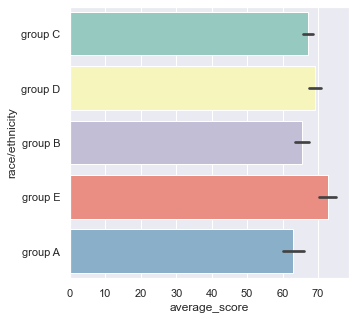

In [28]:
sns.categorical.barplot(y='race/ethnicity',x='average_score',data=df,order=df['race/ethnicity'].value_counts().index,palette=color);


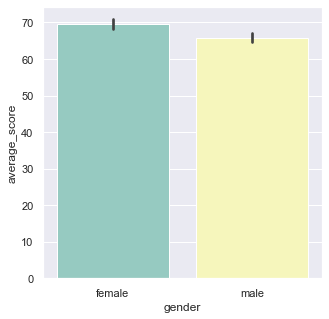

In [29]:
sns.categorical.barplot(x='gender',y='average_score',data=df,order=df['gender'].value_counts().index,palette=color);

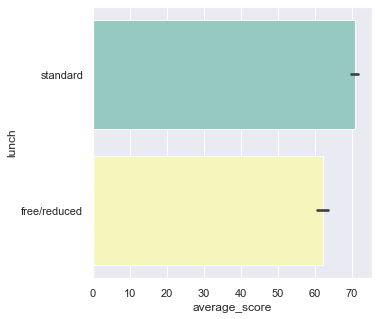

In [30]:
sns.categorical.barplot(y='lunch',x='average_score',data=df,order=df['lunch'].value_counts().index,palette=color);

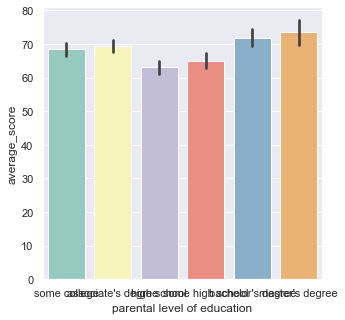

In [31]:
sns.set(rc={'figure.figsize':(5,5)})
sns.categorical.barplot(y='average_score',x='parental level of education',data=df,order=df['parental level of education'].value_counts().index,palette=color);

<AxesSubplot:xlabel='test preparation course', ylabel='average_score'>

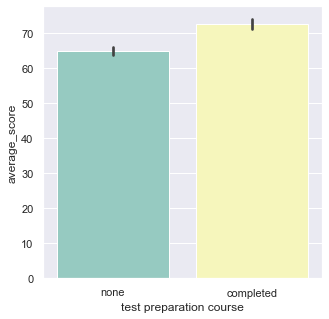

In [32]:
sns.set(rc={'figure.figsize':(5,5)})
sns.categorical.barplot(x='test preparation course',y='average_score',data=df,order=df['test preparation course'].value_counts().index,palette=color)

### What is the effect of gender and education level on the average score?



Female students whose parents’ highest education level is bachelor's and master’s degree perform better. Male students with parents graduating with master's degree perform substantially better than other groups.


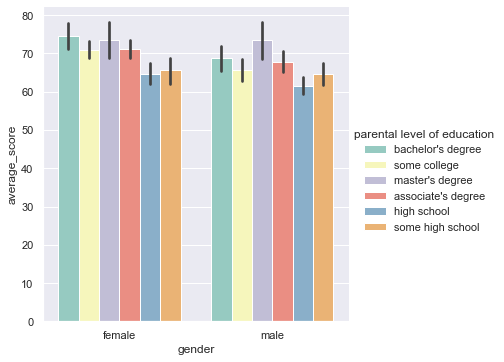

In [33]:
sns.set(rc={'figure.figsize':(3,3)})
sns.catplot(data=df,x="gender",y="average_score",hue="parental level of education",kind="bar",height=5, palette=color);


### What is the effect of gender and preparation course on the average score?


Students who complete the preparation perform better for all genders.

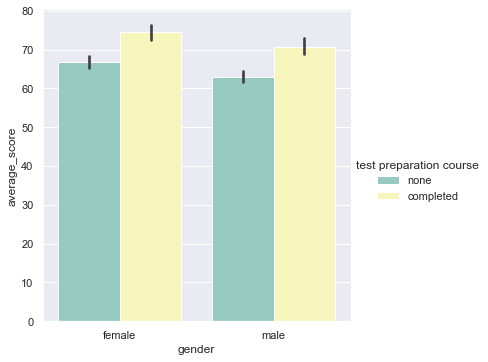

In [34]:
sns.catplot(data=df,x="gender",y="average_score",hue="test preparation course",kind="bar",height=5,palette=color);

In [35]:
#look at the data again
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


### Prepare the data for training

In [36]:
#Take out the score columns from x
x = df.drop(['math score','reading score','writing score'],axis=1) #axis=1 means drop column
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,average_score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,94.000000
996,male,group C,high school,free/reduced,none,57.333333
997,female,group C,high school,free/reduced,completed,65.000000
998,female,group D,some college,standard,completed,74.333333


In [37]:
#make the 'average_score' column y
y = x['average_score'] 
y

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: average_score, Length: 1000, dtype: float64

In [38]:
#Take out the average score column from x after assigning to y
x = x.drop('average_score',axis=1)
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [39]:
#converts categorial data into dummy (1&0)
x = pd.get_dummies(x)
x

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [40]:
#Import all the libraries needed for machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [94]:
#split the data into training & testing set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [102]:
#Metrics for evaluating the performance
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
data_scores=[]
def EvaluatingModels(true_value,predicted_value,model):
    R_Squared = r2_score(true_value,predicted_value)
    MSE = mean_squared_error(true_value,predicted_value)
    data_scores.append([model, R_Squared, MSE]) 
    print("R-squared:", R_Squared)
    print("Mean Square Error:", MSE)

In [103]:
#Random Forest
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
RF_prediction= RF.predict(x_test)
EvaluatingModels(y_test,RF_prediction,'Random Forest Regressor')


R-squared: -0.04927339177582768
Mean Square Error: 203.0856524845143


In [104]:
#Decision Tree
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)
DT_prediction = DT.predict(x_test)
EvaluatingModels(y_test,DT_prediction,'Decision Tree Regressor')


R-squared: -0.18258739114627165
Mean Square Error: 228.88842301093112


In [105]:
#Linear
LR=LinearRegression()
LR.fit(x_train,y_train)
LR_prediction = DT.predict(x_test)
EvaluatingModels(y_test,LR_prediction,'Linear Regression')



R-squared: -0.18258739114627165
Mean Square Error: 228.88842301093112


In [106]:
#compare each techniques 
compare=pd.DataFrame(data_scores,columns=['Model','R-squared','Mean Square Error'])
compare

,Model,R-squared,Mean Square Error
0,Random Forest Regressor,-0.049273,203.085652
1,Decision Tree Regressor,-0.182587,228.888423
2,Linear Regression,-0.182587,228.888423


It can be seen that R-squared values are negative for all three techniques which mean they are not effective.

In [99]:
#Now Let's try Ridge technique
#Ridge
R = Ridge()
R.fit(x_train,y_train)
R_prediction = R.predict(x_test)
EvaluatingModels(y_test,R_prediction,'Ridge')


R-squared: 0.16463536684969693
Mean Square Error: 161.68385943599841


In [100]:
#compare each techniques 
#It can be seen that Ridge performs the best
compare=pd.DataFrame(data_scores,columns=['Model','R-squared','Mean Square Error'])
compare

,Model,R-squared,Mean Square Error
0,Random Forest Regressor,-0.028476,199.060298
1,Decision Tree Regressor,-0.194382,231.171250
2,Linear Regression,-0.194382,231.171250
3,Ridge,0.164635,161.683859


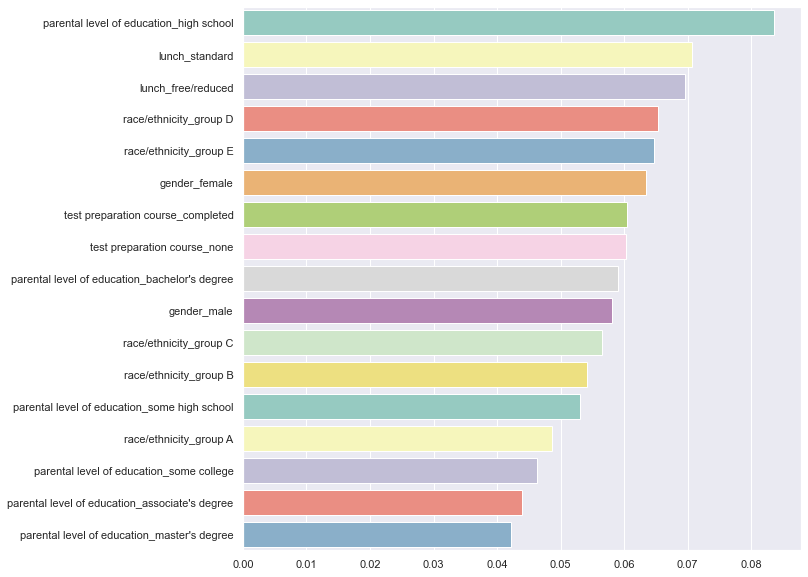

In [93]:
#Feature importance plot from Random Forest
sns.set(rc={'figure.figsize':(10,10)})
feature_importances = pd.DataFrame(RF.feature_importances_, index = x_train.columns, columns=['importance']).sort_values('importance',ascending=False)
sns.barplot(x=feature_importances['importance'].values, y= feature_importances['importance'].index,palette=color);

### Observation

1. Ridge Regression performs the best because there are many highly correlated independent variables.
 - The Mean Square Error value of Ridge is 162, meaning that on average, the prediction have 162 values that are different from the actual values.
2. The R-Squared values of Random Forest Regression, Decision Tree, and Linear Regression are less than 0, meaning that they are not suitable.
3. Based on the feature importance plot, standard lunch